<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/XBNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importation des librairies

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 7/Stage_Noémie/

/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 7/Stage_Noémie


In [3]:
pip install --upgrade git+https://github.com/tusharsarkar3/XBNet.git

  Cloning https://github.com/tusharsarkar3/XBNet.git to /tmp/pip-req-build-7ylubnaa
  Running command git clone -q https://github.com/tusharsarkar3/XBNet.git /tmp/pip-req-build-7ylubnaa


In [4]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi 

import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.cluster import adjusted_rand_score

from joblib import dump, load

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV

from sklearn.preprocessing import *
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
import random
import numpy

import pandas.util.testing as tm

import joblib

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import torch
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from XBNet.training_utils import training,predict
from XBNet.models import XBNETClassifier
from XBNet.run import run_XBNET

In [9]:
df = pad.read_excel('Database_finale.xlsx')
df

,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Class
0,0.4633,0.1076,40.4710,0.0859,0.1338,0.8025,1.0
1,0.4540,0.0997,36.4405,0.0815,0.1233,0.7998,1.0
2,0.4880,0.0803,61.0115,0.0558,0.1058,0.7631,1.0
3,0.4113,0.1118,34.3492,0.0926,0.1467,0.7588,1.0
4,0.6148,0.0940,31.4994,0.0792,0.1329,0.7026,1.0
...,...,...,...,...,...,...,...
1627,0.5041,0.1099,46.2522,0.0845,0.1460,0.7514,1.0
1628,0.4571,0.1253,41.3130,0.0995,0.1825,0.6850,1.0
1629,0.3610,0.1406,30.2030,0.1194,0.2063,0.6746,1.0
1630,0.5300,0.0692,64.1103,0.0470,0.0923,0.7494,1.0


In [11]:
# Importation des données
X = df.drop("Class", axis = 1)
y = df["Class"]

In [12]:
X_np = np.array(X)

In [13]:
sc = StandardScaler()

In [14]:
X_norm = sc.fit_transform(X_np)

In [15]:
x_data = X_norm
y_data = y

In [16]:
le = LabelEncoder()
y_data = np.array(le.fit_transform(y_data))
print(le.classes_)

[0. 1.]


In [17]:
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.3,random_state = 0)

In [19]:
# Sur-échantillonnage des données d'entraînement
ros = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = ros.fit_resample(X_train, y_train)

Enter dimensions of linear layers: 
Enter input dimensions of layer 1: 12
Enter output dimensions of layer 1: 24
Set bias as True or False: True
Enter input dimensions of layer 2: 24
Enter output dimensions of layer 2: 2
Set bias as True or False: True
Enter your last layer 
1. Sigmoid 
2. Softmax 
3. None 
2
Enter dimension for Softmax: 1


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Percentage training completed:   3%|▎         | 1/30 [00:04<02:08,  4.44s/it]

Training Loss after epoch 1 is 0.5388637182804255 and Accuracy is 79.53667953667954
Validation Loss after epoch 1 is 0.8115759491920471 and Accuracy is 48.775510204081634


Percentage training completed:   7%|▋         | 2/30 [00:09<02:21,  5.07s/it]

Training Loss after epoch 2 is 0.640280776986709 and Accuracy is 66.89189189189189
Validation Loss after epoch 2 is 0.7521266341209412 and Accuracy is 54.89795918367347


Percentage training completed:  10%|█         | 3/30 [00:14<02:09,  4.79s/it]

Training Loss after epoch 3 is 0.6377990323763627 and Accuracy is 67.03667953667954
Validation Loss after epoch 3 is 0.7340993285179138 and Accuracy is 57.142857142857146


Percentage training completed:  13%|█▎        | 4/30 [00:18<02:01,  4.68s/it]

Training Loss after epoch 4 is 0.6516349104734568 and Accuracy is 66.21621621621621
Validation Loss after epoch 4 is 0.7160590887069702 and Accuracy is 59.38775510204081


Percentage training completed:  17%|█▋        | 5/30 [00:23<01:55,  4.63s/it]

Training Loss after epoch 5 is 0.6348568714582004 and Accuracy is 68.0019305019305
Validation Loss after epoch 5 is 0.7002977132797241 and Accuracy is 60.61224489795919


Percentage training completed:  20%|██        | 6/30 [00:27<01:49,  4.57s/it]

Training Loss after epoch 6 is 0.6170022645821938 and Accuracy is 69.64285714285714
Validation Loss after epoch 6 is 0.7031402587890625 and Accuracy is 60.40816326530612


Percentage training completed:  23%|██▎       | 7/30 [00:32<01:44,  4.54s/it]

Training Loss after epoch 7 is 0.6168405950069428 and Accuracy is 69.4015444015444
Validation Loss after epoch 7 is 0.6959237456321716 and Accuracy is 61.02040816326531


Percentage training completed:  27%|██▋       | 8/30 [00:36<01:39,  4.51s/it]

Training Loss after epoch 8 is 0.6059705649430935 and Accuracy is 70.70463320463321
Validation Loss after epoch 8 is 0.6986801624298096 and Accuracy is 61.224489795918366


Percentage training completed:  30%|███       | 9/30 [00:41<01:34,  4.50s/it]

Training Loss after epoch 9 is 0.6122648417949677 and Accuracy is 69.83590733590734
Validation Loss after epoch 9 is 0.6988016366958618 and Accuracy is 61.02040816326531


Percentage training completed:  33%|███▎      | 10/30 [00:45<01:29,  4.48s/it]

Training Loss after epoch 10 is 0.6118911596444937 and Accuracy is 69.98069498069498
Validation Loss after epoch 10 is 0.697891116142273 and Accuracy is 61.02040816326531


Percentage training completed:  37%|███▋      | 11/30 [00:50<01:24,  4.47s/it]

Training Loss after epoch 11 is 0.6146306858612941 and Accuracy is 69.7876447876448
Validation Loss after epoch 11 is 0.6932438611984253 and Accuracy is 61.224489795918366


Percentage training completed:  40%|████      | 12/30 [00:54<01:20,  4.45s/it]

Training Loss after epoch 12 is 0.6052701321931986 and Accuracy is 70.55984555984556
Validation Loss after epoch 12 is 0.6922729015350342 and Accuracy is 61.63265306122449


Percentage training completed:  43%|████▎     | 13/30 [00:59<01:15,  4.45s/it]

Training Loss after epoch 13 is 0.6094750560246981 and Accuracy is 70.17374517374517
Validation Loss after epoch 13 is 0.6962115168571472 and Accuracy is 61.42857142857143


Percentage training completed:  47%|████▋     | 14/30 [01:03<01:11,  4.45s/it]

Training Loss after epoch 14 is 0.6111299631687311 and Accuracy is 70.07722007722008
Validation Loss after epoch 14 is 0.6984227299690247 and Accuracy is 61.224489795918366


Percentage training completed:  50%|█████     | 15/30 [01:07<01:06,  4.46s/it]

Training Loss after epoch 15 is 0.6122311995579646 and Accuracy is 70.07722007722008
Validation Loss after epoch 15 is 0.699225664138794 and Accuracy is 61.224489795918366


Percentage training completed:  53%|█████▎    | 16/30 [01:12<01:02,  4.44s/it]

Training Loss after epoch 16 is 0.6121434528094072 and Accuracy is 70.02895752895753
Validation Loss after epoch 16 is 0.6995419263839722 and Accuracy is 60.816326530612244


Percentage training completed:  57%|█████▋    | 17/30 [01:16<00:57,  4.43s/it]

Training Loss after epoch 17 is 0.6121265938648811 and Accuracy is 70.17374517374517
Validation Loss after epoch 17 is 0.6994588971138 and Accuracy is 61.224489795918366


Percentage training completed:  60%|██████    | 18/30 [01:21<00:53,  4.43s/it]

Training Loss after epoch 18 is 0.6120516284154012 and Accuracy is 70.27027027027027
Validation Loss after epoch 18 is 0.7008135914802551 and Accuracy is 60.816326530612244


Percentage training completed:  63%|██████▎   | 19/30 [01:25<00:48,  4.41s/it]

Training Loss after epoch 19 is 0.6120137508098896 and Accuracy is 69.7876447876448
Validation Loss after epoch 19 is 0.6959444284439087 and Accuracy is 61.63265306122449


Percentage training completed:  67%|██████▋   | 20/30 [01:29<00:43,  4.39s/it]

Training Loss after epoch 20 is 0.6099171576591639 and Accuracy is 70.22200772200772
Validation Loss after epoch 20 is 0.6947243213653564 and Accuracy is 61.63265306122449


Percentage training completed:  70%|███████   | 21/30 [01:34<00:39,  4.40s/it]

Training Loss after epoch 21 is 0.6100739641831472 and Accuracy is 70.17374517374517
Validation Loss after epoch 21 is 0.7003328204154968 and Accuracy is 60.61224489795919


Percentage training completed:  73%|███████▎  | 22/30 [01:38<00:35,  4.40s/it]

Training Loss after epoch 22 is 0.6114691527990195 and Accuracy is 70.12548262548262
Validation Loss after epoch 22 is 0.6967437267303467 and Accuracy is 61.02040816326531


Percentage training completed:  77%|███████▋  | 23/30 [01:43<00:30,  4.39s/it]

Training Loss after epoch 23 is 0.613742108299182 and Accuracy is 70.07722007722008
Validation Loss after epoch 23 is 0.6859748959541321 and Accuracy is 62.6530612244898


Percentage training completed:  80%|████████  | 24/30 [01:47<00:26,  4.40s/it]

Training Loss after epoch 24 is 0.6197544205647249 and Accuracy is 69.83590733590734
Validation Loss after epoch 24 is 0.7000993490219116 and Accuracy is 61.02040816326531


Percentage training completed:  83%|████████▎ | 25/30 [01:53<00:23,  4.77s/it]

Training Loss after epoch 25 is 0.618192992072839 and Accuracy is 69.54633204633204
Validation Loss after epoch 25 is 0.6839392781257629 and Accuracy is 62.44897959183673


Percentage training completed:  87%|████████▋ | 26/30 [01:57<00:18,  4.65s/it]

Training Loss after epoch 26 is 0.6299707729082841 and Accuracy is 68.43629343629344
Validation Loss after epoch 26 is 0.6735432744026184 and Accuracy is 64.08163265306122


Percentage training completed:  90%|█████████ | 27/30 [02:01<00:13,  4.57s/it]

Training Loss after epoch 27 is 0.6067607602247825 and Accuracy is 70.84942084942085
Validation Loss after epoch 27 is 0.6723235249519348 and Accuracy is 63.46938775510204


Percentage training completed:  93%|█████████▎| 28/30 [02:06<00:09,  4.57s/it]

Training Loss after epoch 28 is 0.6285745503810736 and Accuracy is 68.91891891891892
Validation Loss after epoch 28 is 0.6635692715644836 and Accuracy is 64.48979591836735


Percentage training completed:  97%|█████████▋| 29/30 [02:10<00:04,  4.51s/it]

Training Loss after epoch 29 is 0.6003132547323521 and Accuracy is 71.42857142857143
Validation Loss after epoch 29 is 0.6634094715118408 and Accuracy is 64.89795918367346


Percentage training completed: 100%|██████████| 30/30 [02:15<00:00,  4.51s/it]

Training Loss after epoch 30 is 0.6421246654712237 and Accuracy is 67.32625482625483
Validation Loss after epoch 30 is 0.6412151455879211 and Accuracy is 66.93877551020408
              precision    recall  f1-score   support

           0       0.70      0.61      0.65      1036
           1       0.65      0.73      0.69      1036

    accuracy                           0.67      2072
   macro avg       0.68      0.67      0.67      2072
weighted avg       0.68      0.67      0.67      2072

              precision    recall  f1-score   support

           0       0.14      0.69      0.23        35
           1       0.97      0.67      0.79       455

    accuracy                           0.67       490
   macro avg       0.55      0.68      0.51       490
weighted avg       0.91      0.67      0.75       490

Validation Loss after epoch 30 is 0.6412151455879211 and Accuracy is 66.93877551020408


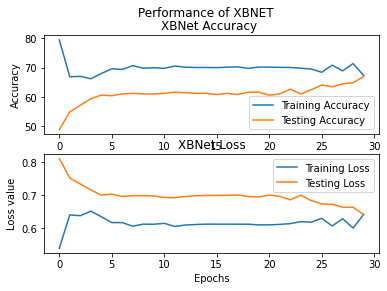

In [20]:
model = XBNETClassifier(X_train,y_train,2)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

m,acc, lo, val_ac, val_lo = run_XBNET(X_train,X_test,y_train,y_test,model,criterion,optimizer,16,30)
results = predict(m,x_data)

In [ ]:
#X_train_tensor = torch.from_numpy(X_train)
#y_train_tensor = torch.from_numpy(y_train)

In [21]:
X_tensor = torch.from_numpy(X_norm)

In [22]:
outputs = model(X_tensor.float())

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [ ]:
outputs

In [23]:
proba = outputs[:,:].detach().numpy()

In [24]:
proba

array([[1.1325469e-03, 9.9886751e-01],
       [9.9967885e-01, 3.2112902e-04],
       [6.5952368e-17, 1.0000000e+00],
       ...,
       [6.9224357e-32, 1.0000000e+00],
       [1.2520103e-15, 1.0000000e+00],
       [1.5771693e-04, 9.9984229e-01]], dtype=float32)

In [25]:
predictions = np.where(proba[:,0]>0.50,0,1)

In [26]:
predictions[:300]

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
df['ClassPredict'] = predictions

In [ ]:
df['ClassPredict'].to_csv('prediction.csv', index = False)

In [27]:
import matplotlib.pyplot as plt

In [28]:
yhat = proba

In [29]:
yhat

array([[1.1325469e-03, 9.9886751e-01],
       [9.9967885e-01, 3.2112902e-04],
       [6.5952368e-17, 1.0000000e+00],
       ...,
       [6.9224357e-32, 1.0000000e+00],
       [1.2520103e-15, 1.0000000e+00],
       [1.5771693e-04, 9.9984229e-01]], dtype=float32)

In [ ]:
#pip install matplotlib

Best Threshold=0.999492, G-Mean=0.693


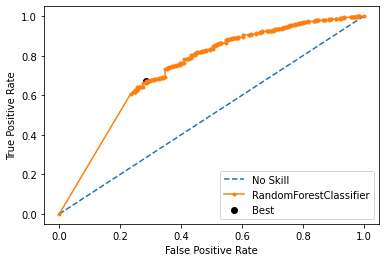

In [30]:
from numpy import argmax
from numpy import sqrt

#yhat = model_rdf.predict_proba(X)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RandomForestClassifier')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [33]:
auc = roc_auc_score(y, yhat)
print(auc)

0.7366206696443436


In [31]:
dump(model, "XBNet.joblib")

['XBNet.joblib']

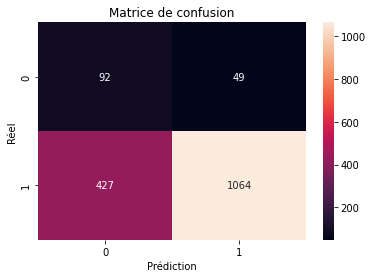

In [34]:
conf_matrix = tf.math.confusion_matrix(labels=y_data, predictions=predictions)
 
ax_sgd_01 = sns.heatmap(conf_matrix, annot = True, fmt='d')
ax_sgd_01.set_title('Matrice de confusion')
ax_sgd_01.set_ylabel('Réel')
ax_sgd_01.set_xlabel('Prédiction')
plt.show()

In [ ]:
df['ClassPredict'] = predictions

In [ ]:
df['ClassPredict'].to_csv('prediction.csv', index = False)